<a href="https://colab.research.google.com/github/JiaxinLi-lipluszn/Organized-Notebook/blob/main/Load_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
vits.test()

Here is the correct vit!


# Load model part

In [ ]:
import os 
os.chdir("/content/drive/MyDrive/DINO_Group/128+2-Fourier-4")

In [ ]:
with open("test1.txt", mode = 'a',) as f:
  print(f"Hello world!", file = f)
f.close()

In [ ]:
import vision_transformer as vits
import utils

In [ ]:
model = vits.vit_tiny()
#print(f"Model {args.arch} {args.patch_size}x{args.patch_size} built.")

utils.load_pretrained_weights(model, "/content/drive/MyDrive/DINO_Group/128+2-Fourier-4/128+2-F-4/checkpoint0025.pth", "student", "vit_tiny", 16)
model.eval()


Take key student in provided checkpoint dict
Pretrained weights found at /content/drive/MyDrive/DINO_Group/128+2-Fourier-4/128+2-F-4/checkpoint0025.pth and loaded with msg: _IncompatibleKeys(missing_keys=[], unexpected_keys=['head.mlp.0.weight', 'head.mlp.0.bias', 'head.mlp.2.weight', 'head.mlp.2.bias', 'head.mlp.4.weight', 'head.mlp.4.bias', 'head.last_layer.weight_g', 'head.last_layer.weight_v'])


VisionTransformer(
  (pos_drop): Dropout(p=0.0, inplace=False)
  (norm): LayerNorm((132,), eps=1e-06, elementwise_affine=True)
  (blocks): ModuleList(
    (0): Block(
      (norm1): LayerNorm((132,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=132, out_features=396, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=132, out_features=132, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((132,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=132, out_features=528, bias=True)
        (act): GELU()
        (fc2): Linear(in_features=528, out_features=132, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
    (1): Block(
      (norm1): LayerNorm((132,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=132, out_feat

In [ ]:
pip install umap-learn

     |████████████████████████████████| 80 kB 3.2 MB/s 
     |████████████████████████████████| 1.1 MB 8.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76566 sha256=0ff04bec737c011f45fbd22240904f09124454b5ee3764c4486969497d8300e3
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52372 sha256=93d52325398b665671a0a4f33a6171ae71b29a1e91e5b68f080cd6511006b292
  Stored in directory: /root/.cache/pip/wheels/d0/5b/62/3401692ddad12324249c774c4b15ccb046946021e2b581c043
Successfully built umap-learn pynndescent


In [ ]:
pip install scprep

     |████████████████████████████████| 104 kB 5.5 MB/s 


torch.Size([784, 2])


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


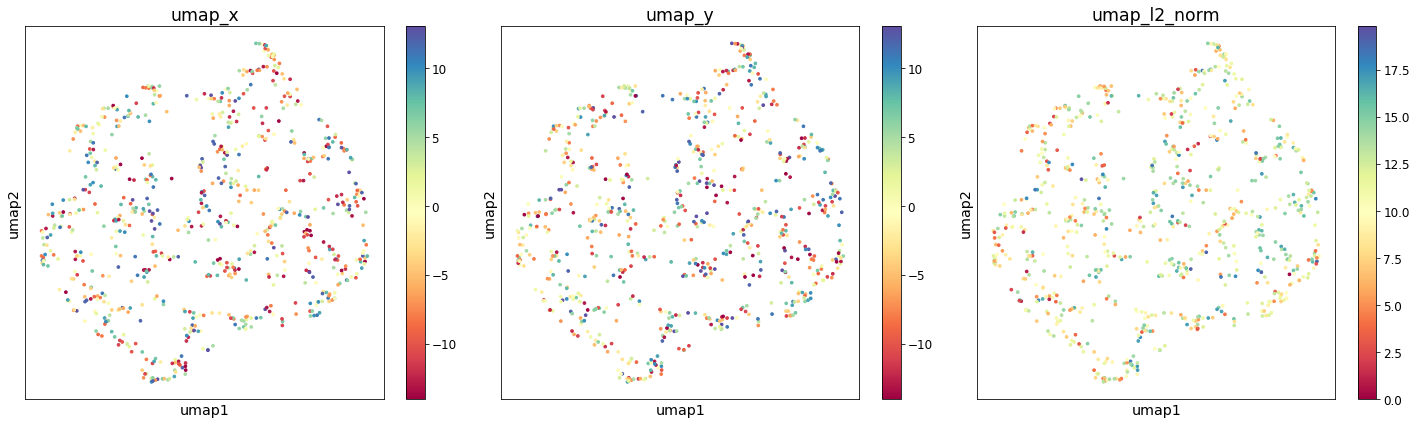

In [ ]:
import umap
from sklearn.preprocessing import StandardScaler
import scprep
import numpy as np
import math

## First, load index embedding weights from the learned model 


pos_embed = model.state_dict().get('Embedding.weight').cpu()
print(pos_embed.shape)
## Secondly, calculate 784 pixels' embedding coordinates
emb_cor = pos_embed # emb_cor.shape shoule be (784, coordinates dimensions). perhaps you need pandas.DataFrame here

## Also, you need to calculate/load ground truth coordinates:
x_cor = np.arange(784) // 28 - 14 # should be an array/series (784-dim vector)
y_cor = np.arange(784) % 28 - 14
max_norm = []
l2_norm = []
for i in range(784):
  max_norm.append(max(abs(x_cor[i]), abs(y_cor[i])))
  l2_norm.append(math.sqrt(x_cor[i]**2 + y_cor[i]**2))
max_norm = np.array(max_norm)

l2_norm = np.array(l2_norm)

## Then, run the following to plot the figure.

umap_operator = umap.UMAP(n_components=2, n_neighbors= 30) # n_components = 2: 2-dim umap 
Y_UMAP = umap_operator.fit_transform(emb_cor) 


### visualization ###
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

scprep.plot.scatter2d(Y_UMAP, label_prefix="umap", title="umap_x",
                      c=x_cor, ticks=False, cmap='Spectral', ax=ax1)

scprep.plot.scatter2d(Y_UMAP, label_prefix="umap", title="umap_y",
                      c=y_cor, ticks=False, cmap='Spectral', ax=ax2) 
scprep.plot.scatter2d(Y_UMAP, label_prefix="umap", title="umap_l2_norm",
                      c=l2_norm, ticks=False, cmap='Spectral', ax=ax3) 

plt.tight_layout()
plt.show()

In [ ]:
pip install sklearn

In [ ]:
import torch.nn as nn
#import sklearn.model_selection.train_test_split

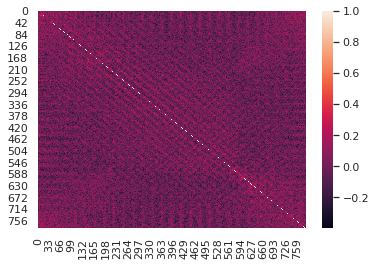

In [ ]:
pos_embed = model.state_dict().get('Embedding.weight').cpu()

import seaborn as sns; sns.set_theme()
import sklearn
input1 = pos_embed
input2 = pos_embed
cos = nn.CosineSimilarity(dim=1)
#input = IndexToCorr(np.arange(784))
#input = np.array(input).T + 1/28
#print(len(input))
#print(input)
p1 = sklearn.metrics.pairwise.cosine_similarity(pos_embed, pos_embed, dense_output=True)
#print(p1)
#similarity  = cos(input1, input2)

p2 = p1[406,:].reshape(28,28)
#print(p2)
ax = sns.heatmap(p1)

# Draw loss curve

In [ ]:
import re
import numpy as np
import pandas as pd

In [ ]:
def loadLoss(log_dir, model_name):
  output_dir = log_dir
  log_file_name = "log.txt"
  f = open(output_dir + log_file_name)              
  line = f.readline()     
  df = pd.DataFrame(columns = ["Epoch",model_name + " Train Loss"])
  while line: 
    numbers = np.array(re.findall("{\"train_loss\": (.+?), \"train_lr\": (.+?), \"train_wd\": (.+?), \"epoch\": (.+?)}", line)).astype(np.float)    
    numbers = numbers[0]
    loss = numbers[0]
    print(loss)
    epoch = numbers[-1]
    #print(type(epoch))
    aline =  {"Epoch":epoch,model_name + " Train Loss": loss}
    df = df.append(aline, ignore_index= True )
    
    line = f.readline() 

  f.close() 
  return df

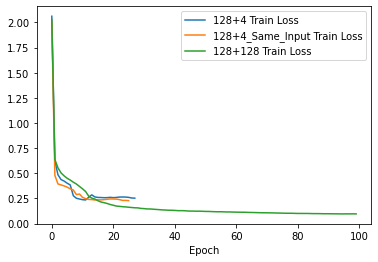

In [ ]:
loss_df.plot (x = "Epoch")

# Load Acc part

In [ ]:
def loadKNNAcc(acc_dir, model_name, ts):
  output_dir = acc_dir
  log_file_name = ts + "_knn_acc.txt"
  f = open(output_dir + log_file_name)              
  line = f.readline()     
  df = pd.DataFrame(columns = ["Epoch",model_name + " " + ts])
  while line: 
    numbers = np.array(re.findall("epoch: (.+?), 10-NN classifier result: Top1: (.+?), Top5: (.+?)", line)).astype(np.float)    
    #print(numbers)
    numbers = numbers[0]
    acc = numbers[1]
    epoch = int(numbers[0])
    #print(type(epoch))
    print(epoch)
    aline =  {"Epoch":epoch,model_name + " " + ts: acc}
    df = df.append(aline, ignore_index= True )
    
    line = f.readline() 

  f.close() 
  return df

In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
model_dic = {
    #"/content/drive/MyDrive/DINO_Group/128+128_TS/": "128+128",
    #"/content/drive/MyDrive/DINO_Group/128+4/": "128+4",
    #"/content/drive/MyDrive/DINO_Group/128+2-Fourier-4/": "128+2 Learnable Fourier 4",
    #"/content/drive/MyDrive/DINO_Group/128+4_Same_Input/": "128+4 Same Input",
    #"/content/drive/MyDrive/DINO_Group/128/": "Only 128D pixel",
    "/content/drive/MyDrive/DINO_Group/0803_dino_kd_crop_size/global_50_local_50/": "128+4 0.5/0.25",
    "/content/drive/MyDrive/DINO_Group/acc/local125/": "128+4 0.5/0.125",
    #"/content/drive/MyDrive/DINO_Group/0803_dino_kd_crop_size/global_50_local_75/": "128+4 0.5/0.375"
}

In [ ]:
acc_df

NameError: ignored

In [ ]:
epochs = [5* i for i in range(100)]

In [ ]:
acc_df = pd.DataFrame(epochs,columns = ["Epoch"])

In [ ]:
epochs

[0,
 5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 85,
 90,
 95,
 100,
 105,
 110,
 115,
 120,
 125,
 130,
 135,
 140,
 145,
 150,
 155,
 160,
 165,
 170,
 175,
 180,
 185,
 190,
 195,
 200,
 205,
 210,
 215,
 220,
 225,
 230,
 235,
 240,
 245,
 250,
 255,
 260,
 265,
 270,
 275,
 280,
 285,
 290,
 295,
 300,
 305,
 310,
 315,
 320,
 325,
 330,
 335,
 340,
 345,
 350,
 355,
 360,
 365,
 370,
 375,
 380,
 385,
 390,
 395,
 400,
 405,
 410,
 415,
 420,
 425,
 430,
 435,
 440,
 445,
 450,
 455,
 460,
 465,
 470,
 475,
 480,
 485,
 490,
 495]

In [ ]:
#acc_df = acc_df.drop(index=acc_df.index)

acc_df = pd.DataFrame(columns = ["Epoch"])
for model in model_dic.keys():
  for key in ["teacher", "student"]:
    df = loadKNNAcc(model, model_dic[model], key)
    acc_df = pd.merge(acc_df, df, how = "outer", on = "Epoch")
#acc_df = acc_df.sort_values(by="Epoch" , ascending=True) 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30

In [ ]:
acc_df["Dif 0.5/0.25"] = acc_df["128+4 0.5/0.25 teacher"] - acc_df["128+4 0.5/0.25 student"]

In [ ]:
acc_df["Dif 0.5/0.125"] = acc_df["128+4 0.5/0.125 teacher"] - acc_df["128+4 0.5/0.125 student"]

In [ ]:
acc_df['next_acc'] = acc_df["128+4 0.5/0.25 student"].shift(1)


In [ ]:
acc_df["Dif_shift"] = acc_df["Dif 0.5/0.25"].shift(1)

In [ ]:
acc_df['improve'] = acc_df["128+4 0.5/0.25 student"] - acc_df['next_acc']

In [ ]:
len(acc_df)

300

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
acc_df.corr('spearman')

,Epoch,128+4 0.5/0.25 teacher,128+4 0.5/0.25 student,128+4 0.5/0.125 teacher,128+4 0.5/0.125 student,next_acc,improve,Dif 0.5/0.25,Dif 0.5/0.125,Dif_shift
Epoch,1.000000,0.978115,0.979426,0.881455,0.887793,0.979426,-0.237157,0.116559,0.066643,0.116559
128+4 0.5/0.25 teacher,0.978115,1.000000,0.965746,0.936906,0.915791,0.964671,-0.233769,0.199112,0.136506,0.111992
128+4 0.5/0.25 student,0.979426,0.965746,1.000000,0.926143,0.920110,0.964201,-0.150831,0.039124,0.106601,0.131464
128+4 0.5/0.125 teacher,0.881455,0.936906,0.926143,1.000000,0.883158,0.920712,-0.231844,0.141609,0.227429,0.099948
128+4 0.5/0.125 student,0.887793,0.915791,0.920110,0.883158,1.000000,0.922055,-0.236439,0.094731,-0.109263,0.095910
next_acc,0.979426,0.964671,0.964201,0.920712,0.922055,1.000000,-0.317688,0.107517,0.097241,0.039124
improve,-0.237157,-0.233769,-0.150831,-0.231844,-0.236439,-0.317688,1.000000,-0.453285,-0.052196,0.407194
Dif 0.5/0.25,0.116559,0.199112,0.039124,0.141609,0.094731,0.107517,-0.453285,1.000000,0.149532,0.045207
Dif 0.5/0.125,0.066643,0.136506,0.106601,0.227429,-0.109263,0.097241,-0.052196,0.149532,1.000000,-0.003631
Dif_shift,0.116559,0.111992,0.131464,0.099948,0.095910,0.039124,0.407194,0.045207,-0.003631,1.000000


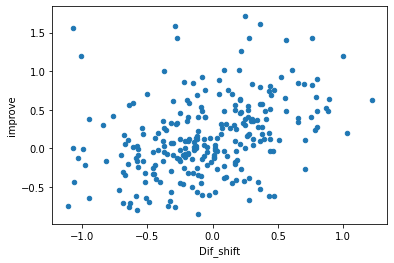

In [ ]:
acc_df.plot.scatter(x = "Dif_shift", y = "improve")

In [ ]:
acc_df

,Epoch,128+4 0.5/0.25 teacher,128+4 0.5/0.25 student,128+4 0.5/0.125 teacher,128+4 0.5/0.125 student,next_acc,improve,Dif 0.5/0.25,Dif 0.5/0.125,Dif_shift
0,0.0,30.53,31.60,32.82,33.35,NaN,NaN,-1.07,-0.53,NaN
1,1.0,30.53,31.60,32.82,33.35,31.60,0.00,-1.07,-0.53,-1.07
2,2.0,33.00,33.16,34.85,34.83,31.60,1.56,-0.16,0.02,-1.07
3,3.0,33.49,33.02,35.42,34.85,33.16,-0.14,0.47,0.57,-0.16
4,4.0,34.12,33.77,34.52,35.41,33.02,0.75,0.35,-0.89,0.47
...,...,...,...,...,...,...,...,...,...,...
295,295.0,NaN,NaN,73.25,73.51,NaN,NaN,NaN,-0.26,NaN
296,296.0,NaN,NaN,72.75,73.46,NaN,NaN,NaN,-0.71,NaN
297,297.0,NaN,NaN,73.37,72.98,NaN,NaN,NaN,0.39,NaN
298,298.0,NaN,NaN,73.24,72.95,NaN,NaN,NaN,0.29,NaN


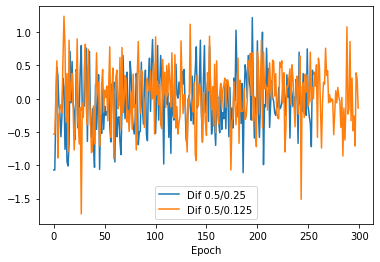

In [ ]:
acc_df.plot(x = "Epoch", y = ["Dif 0.5/0.25", "Dif 0.5/0.125"])

In [ ]:
df_t = loadKNNAcc("./", "128+128", "teacher")

[[ 0.  24.8  7. ]]
[[ 5.  50.2  8. ]]
[[10.   61.33  9.  ]]
[[15.   66.88  9.  ]]
[[20.   67.82  9.  ]]
[[25.   67.78  9.  ]]
[[30.   69.35  9.  ]]
[[35.   69.41  9.  ]]
[[40.   69.63  9.  ]]
[[45.   70.45  9.  ]]
[[50.   70.77  9.  ]]
[[55.   70.11  9.  ]]
[[60.  70.7  9. ]]
[[65.   70.94  9.  ]]
[[70.   70.33  9.  ]]
[[75.   70.66  9.  ]]
[[80.   70.87  9.  ]]
[[85.   70.83  9.  ]]
[[90.   70.75  9.  ]]
[[95.   71.08  9.  ]]


In [ ]:
df_s = loadKNNAcc("./", "128+128", "student")

[[ 0.  26.8  7. ]]
[[ 5.   50.06  8.  ]]
[[10.   61.34  9.  ]]
[[15.   67.15  9.  ]]
[[20.   67.17  9.  ]]
[[25.   67.82  9.  ]]
[[30.  68.8  9. ]]
[[35.   69.47  9.  ]]
[[40.   70.52  9.  ]]
[[45.   70.34  9.  ]]
[[50.   70.14  9.  ]]
[[55.   71.05  9.  ]]
[[60.   70.47  9.  ]]
[[65.   71.42  9.  ]]
[[70.   70.89  9.  ]]
[[75.   71.41  9.  ]]
[[80.   71.27  9.  ]]
[[85.   70.94  9.  ]]
[[90.  71.2  9. ]]
[[95.   71.32  9.  ]]


In [ ]:
df_s = loadKNNAcc("/content/drive/MyDrive/DINO_Group/128+4_Same_Input/", "128+4 Same Input", "student")

[[ 0.   32.09  8.  ]]
[[ 5.   34.76  8.  ]]
[[10.   36.71  8.  ]]
[[15.   37.18  8.  ]]
[[20.   37.58  8.  ]]
[[25.   38.35  8.  ]]
[[30.   39.92  8.  ]]
[[35.   39.74  8.  ]]
[[40.   41.18  8.  ]]
[[45.   42.82  8.  ]]


In [ ]:
df_acc = pd.merge(df_acc, df_s, how = "outer", on = "Epoch")

In [ ]:
df_acc

,Epoch,128+128 teacher KNN acc,128+128 student KNN acc,128+4 Same Input teacher KNN acc,128+4 Same Input student KNN acc
0,0.0,24.80,26.80,31.81,32.09
1,5.0,50.20,50.06,34.78,34.76
2,10.0,61.33,61.34,36.03,36.71
3,15.0,66.88,67.15,36.36,37.18
4,20.0,67.82,67.17,38.07,37.58
5,25.0,67.78,67.82,38.56,38.35
6,30.0,69.35,68.80,39.49,39.92
7,35.0,69.41,69.47,40.26,39.74
8,40.0,69.63,70.52,41.57,41.18
9,45.0,70.45,70.34,43.06,42.82


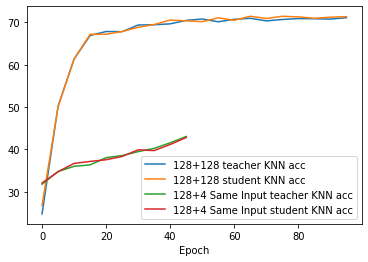

In [ ]:
df_acc.plot(x = "Epoch")

In [ ]:
loss =  loadLoss("/content/drive/MyDrive/DINO_Group/128+4_Same_Input/128+4/", model_name = "128+4 Same Input")

2.0102108079473178
0.47940383466084796
0.3941264146486918
0.3844549240589142
0.37439171877702077
0.3622544935941696
0.345705974427859
0.3337173469543457
0.28811521883010865
0.2937365146358808
0.26006164559523265
0.24851531500220297
0.24003488600651424
0.23862494553923608
0.23461341304977734
0.23624124298493068
0.23560642102559406
0.23791590701341628
0.2417479814330737
0.24487093853354455
0.2443589611053467
0.2432561783850193
0.23846356480518976
0.23051537576913833
0.2303679239710172
0.22838825154900552
0.2287253471752008
0.22967434134085973
0.22828217138648033
0.231691756717364
0.23119456957976023
0.2312903565307458
0.2352771651228269
0.25102660731871923
0.2372705892165502
0.23090245237747828
0.22661439622243246
0.22571412219603856
0.22712647675474484
0.22839552237987518
0.23019504294395446
0.22803195638259252
0.22798295191526413
0.22406445033947628
0.22505718088348706
0.22251176302830378
0.22525039610465367
0.2229484474082788
0.2240112000842889
0.22204581286907196
0.22424963308175405


In [ ]:
df_acc = pd.merge(df_acc, loss, how = "outer", on = "Epoch" )

,Epoch,128+128 teacher KNN acc,128+128 student KNN acc,128+4 Same Input teacher KNN acc,128+4 Same Input student KNN acc,128+4 Same Input Train Loss
0,0.0,24.80,26.80,31.81,32.09,2.010211
1,5.0,50.20,50.06,34.78,34.76,0.362254
2,10.0,61.33,61.34,36.03,36.71,0.260062
3,15.0,66.88,67.15,36.36,37.18,0.236241
4,20.0,67.82,67.17,38.07,37.58,0.244359
...,...,...,...,...,...,...
62,53.0,NaN,NaN,NaN,NaN,0.219672
63,54.0,NaN,NaN,NaN,NaN,0.219467
64,56.0,NaN,NaN,NaN,NaN,0.216683
65,57.0,NaN,NaN,NaN,NaN,0.214914


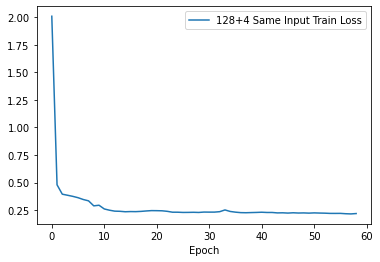

In [ ]:
loss.plot(x = "Epoch", y = "128+4 Same Input Train Loss")

In [ ]:
acc_df = loadKNNAcc("/content/drive/MyDrive/DINO_Group/128+128_TS/", "128+128", "teacher")

[[ 0.  24.8  7. ]]
[[ 5.  50.2  8. ]]
[[10.   61.33  9.  ]]
[[15.   66.88  9.  ]]
[[20.   67.82  9.  ]]
[[25.   67.78  9.  ]]
[[30.   69.35  9.  ]]
[[35.   69.41  9.  ]]
[[40.   69.63  9.  ]]
[[45.   70.45  9.  ]]
[[50.   70.77  9.  ]]
[[55.   70.11  9.  ]]
[[60.  70.7  9. ]]
[[65.   70.94  9.  ]]
[[70.   70.33  9.  ]]
[[75.   70.66  9.  ]]
[[80.   70.87  9.  ]]
[[85.   70.83  9.  ]]
[[90.   70.75  9.  ]]
[[95.   71.08  9.  ]]


In [ ]:
df = loadKNNAcc("/content/drive/MyDrive/DINO_Group/128+4_Same_Input/", "128+4 Same Input", "teacher")


[[ 0.   31.81  8.  ]]
[[ 5.   34.78  8.  ]]
[[10.   36.03  8.  ]]
[[15.   36.36  8.  ]]
[[20.   38.07  8.  ]]
[[25.   38.56  8.  ]]
[[30.   39.49  8.  ]]
[[35.   40.26  8.  ]]
[[40.   41.57  8.  ]]
[[45.   43.06  8.  ]]
[[50.   43.98  8.  ]]
[[55.   44.94  8.  ]]
[[60.   45.22  8.  ]]
[[65.  47.4  8. ]]
[[70.   48.53  8.  ]]
[[75.   47.59  8.  ]]
[[80.   47.64  8.  ]]
[[85.   47.86  8.  ]]
[[90.   47.59  8.  ]]
[[95.   48.71  8.  ]]


In [ ]:
acc_df = pd.merge(acc_df, df, how = "outer", on = "Epoch")

In [ ]:
acc_df = acc_df.drop("128+4 Same Input student KNN acc", axis = 1)

In [ ]:
acc_df

,Epoch,128+128 teacher KNN acc,128+128 student KNN acc,128+4 teacher KNN acc,128+4 student KNN acc,128+4 Same Input student KNN acc,128+4 Same Input teacher KNN acc
0,0.0,24.80,26.80,31.33,30.78,32.09,31.81
1,5.0,50.20,50.06,34.03,35.01,34.76,34.78
2,10.0,61.33,61.34,35.92,35.12,36.71,36.03
3,15.0,66.88,67.15,37.16,37.37,37.18,36.36
4,20.0,67.82,67.17,38.76,39.71,37.58,38.07
5,25.0,67.78,67.82,41.77,41.97,38.35,38.56
6,30.0,69.35,68.80,43.07,43.33,39.92,39.49
7,35.0,69.41,69.47,44.61,44.97,39.74,40.26
8,40.0,69.63,70.52,46.16,46.56,41.18,41.57
9,45.0,70.45,70.34,47.80,47.85,42.82,43.06


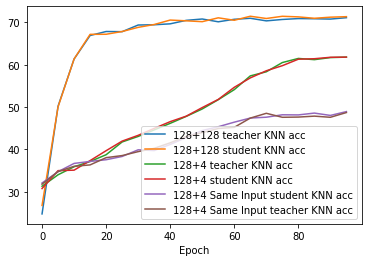

In [ ]:
acc_df.plot(x = "Epoch", )